**The Geography of Human Flourishing**

Team of the __[Spatial AI-Challenge 2024](https://i-guide.io/spatial-ai-challenge-2024/)__ 
Spatial AI-Challenge 2024: Stefano Iacus, Devika Jain, Andrea Nasuto. 

Other co-authors related to this project: Giuseppe Porro, Marcello Carammia, Andrea Vezzulli.

**Objective**

This notebook provides a comprehensive guide to generating, processing and visualizing the The Geography of Human Flourishing dataset at various geospatial and temporal scale.  In this notebook, we will cover the full workflow, from data preparation, fine tuning, classification, constructions of indicators to visualization of the results. This notebook is designed to guide you through each step of the process, from data handling and preprocessing to building and evaluating a the Human Flourishing indicatiors. By the end, you’ll have a structured dataset and visualzation that you can expand upon for more complex geospatial analyses. 

Please use the **Table of Content (TOC)** below navigate the sections.

## Table of Content
1. [Introduction](#Introduction)
2. [Dataset Description](#Dataset-Description)
3. [Methodology](#Methodology)
4. [Results](#Results)
5. [Interpretation](#Interpretation)
6. [Next Steps](Next-Steps) 
7. [Publications](Publications)
8. [Acknowledgements](Acknowledgements)
9. [Appendix](Appendix)

## Introduction 

**What is Human Florushing?**

__[The Human Flourishing Program](https://hfh.fas.harvard.edu/)__ is a research initiative whose goal is to study and promote human flourishing across a broad spectrum of life domains, integrating interdisciplinary research in social sciences, philosophy, psychology, and other fields. 
__[The Global Flourishing Study (GFS)](https://hfh.fas.harvard.edu/global-flourishing-study)__, a five-year traditional longitudinal data collection on approximately 200,000 participants from 20+ geographically and culturally diverse countries and territories, measures global human flourishing in six areas: Happiness and life satisfaction; Mental and physical health; Meaning and purpose; Character and virtue; Close social relationships and Material and financial stability.

**Our Approach**

The Geography of Human Flourishing research plan is to analyze Harvard’s collection of 10 billion geolocated tweets from 2010 to mid-2023 in view of the six areas identified by the GFS. 
The project applies __[fine-tuned large language models (LLMs)](https://arxiv.org/abs/2411.00890)__ to extract 46 human flourishing dimensions across the six areas, generate high-resolution spatio-temporal indicators. 
The project will apply large language models, to extract 46 human flourishing dimensions across the six areas of human flourishing, generate high-resolution spatio-temporal indicators and produce interactive tools to visualize and analyze the result. 
For the Spatial AI-Challenge 2024, the project analyzes a subset of **2.2 billion** tweets geolocalized in the USA and generates interactive visualization tools. Given the scalability challenge, this project analyzes in parallel also the so-called migration mood and the perception of corruption. 
Well-being, migration mood and corruption are topics that are tradionally studied in couples (migration mood vs happiness; migration and corruption; corruption and well-being). This research project will study the interplay of these three large areas of research.

## Dataset Description 

The Harvard Center for Geographic Analysis (CGA) maintains the Geotweet Archive, a global record of tweets spanning time, geography, and language. The Archive extends from 2010 to July 12, 2023 when Twitter stopped allowing free access to its API, transitioning API access to a paid model. The number of tweets in the collection totals approximately 10 billion multilingual global tweets (see map below), and it is stored on Harvard University’s High Performance Computing (HPC) cluster. For more information about the archive and how to acces it please click see our Dataverse page __[Geotweets Archive v2.0](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/3NCMB6)__.

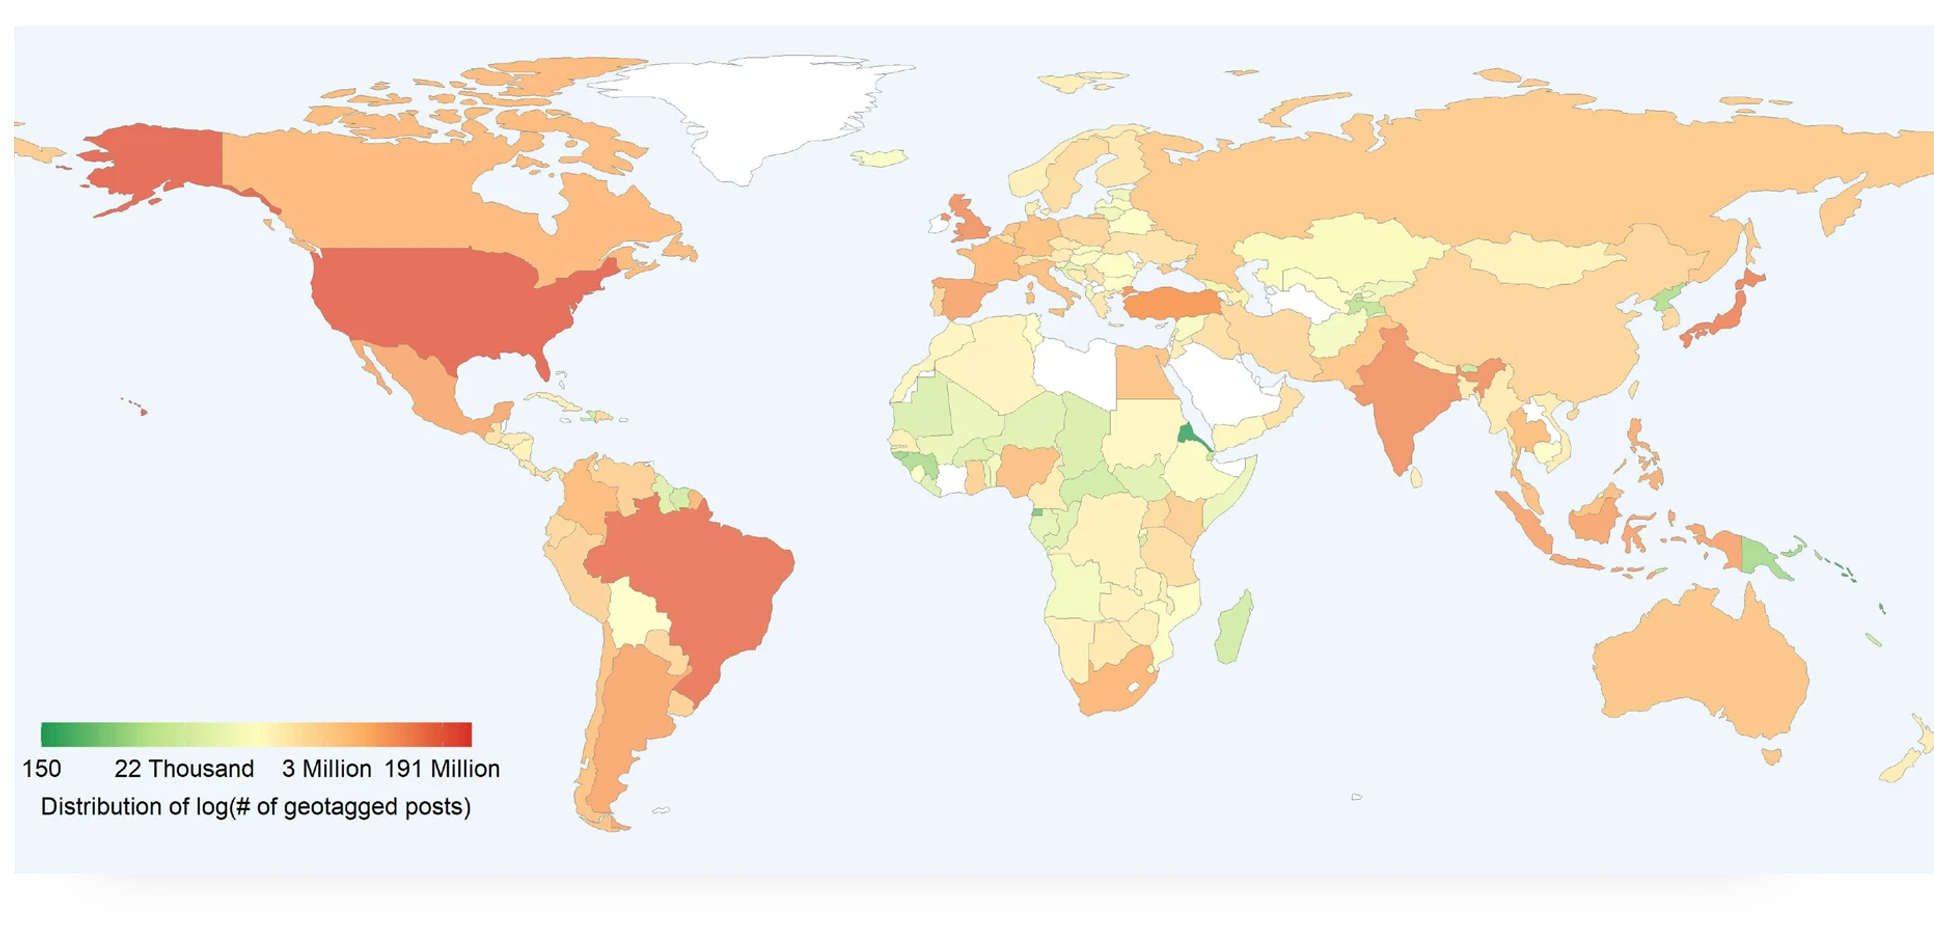

**Sample data preview for Geotweets Archive v2.0 Dataset**
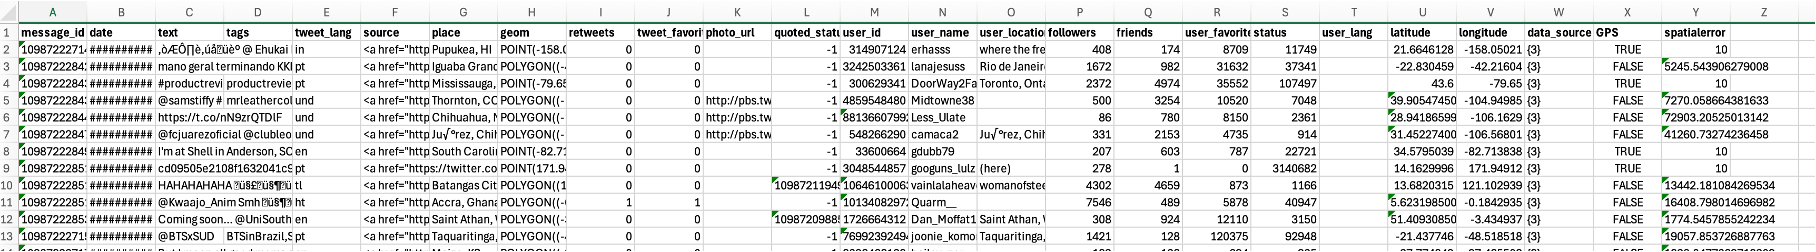


**US Tweets vs Global Tweets Statistics by Year**

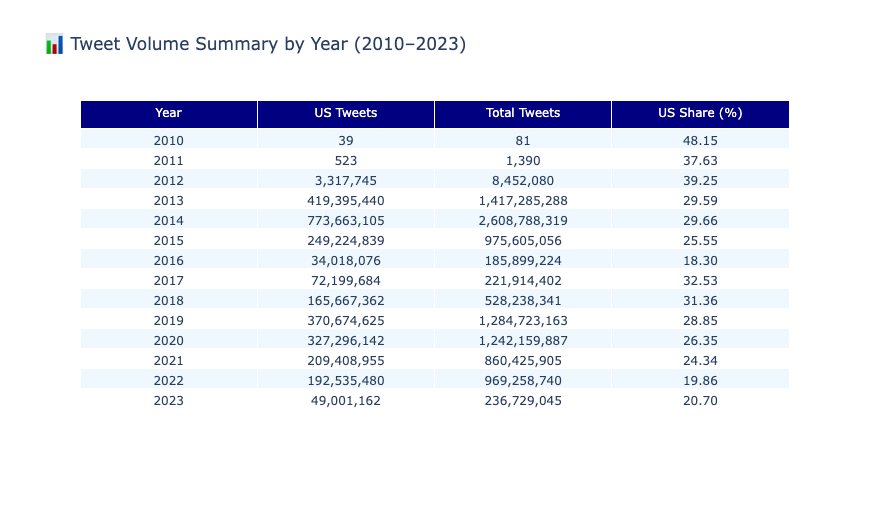

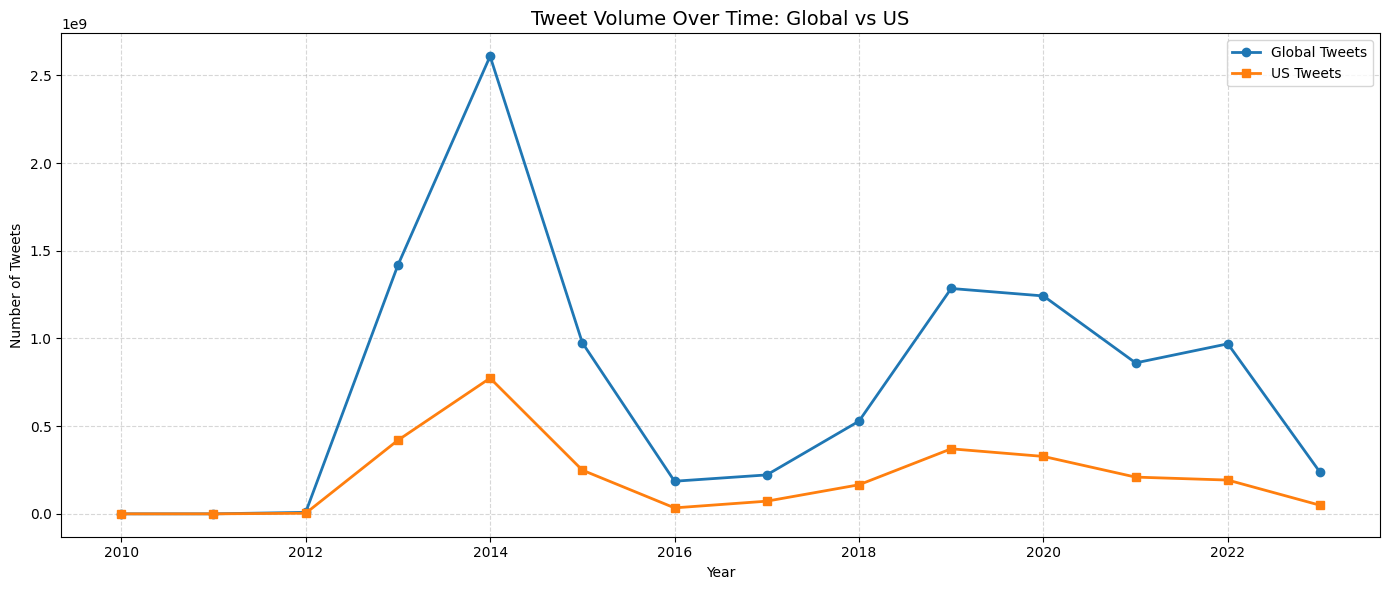

## Methodology

## Results

This notebook that shows (partial) results of the LLM analysis of the **2.2 billion** subset of **USA** tweets extracted from the global Harvard's Geotweets Archive v2.0. Each raw tweets from the archive was further enriched with **8,180,866** Census Blocks Geography. The analysis was run at Census ID level and aggreagated at County and State level by year. Our computations for entire the US and full time period of 13 years are ongoing. On the main __[siacus/Florusihing](https://huggingface.co/datasets/siacus/flourishing)__ data repository on Huggingface (that will be constantly updated as data are avaiable) you can also find monthly aggregation by county and state as well.

**Interactive Map**

You can explore partial results (year >= 2012) for some of the **46** flourishing dimensions on our __[Interactive Map](https://askdataverse.shinyapps.io/FlourishingMap/)__. See demo video below.

In [11]:
from IPython.display import IFrame

IFrame("https://www.youtube.com/embed/gjWqEcGLWd0", width=640, height=360)



Let us explore ```Happiness`` using the code below. 

In [ ]:
# run this block to install all import the required libraries. 

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


In [ ]:
# Load data from Hugging Face: https://huggingface.co/datasets/siacus/flourishing

state_ds = load_dataset("siacus/flourishing", data_files="flourishingStateYear.parquet") # Load data for states for each year
county_ds = load_dataset("siacus/flourishing", data_files="flourishingCountyYear.parquet") # Load data for county for each year

state_df = state_ds["train"].to_pandas()  
county_df = county_ds["train"].to_pandas()


In [ ]:
# Filter for ``Happiness`` for specific year

var = "happiness" #Select ``Happiness`` from the Flourishing data
yr = 2020        #Select 2012 as the year

state_plot = state_df[(state_df["variable"] == var) & (state_df["year"] == yr)].copy() #State-Level data
county_plot = county_df[(county_df["variable"] == var) & (county_df["year"] == yr)].copy() # County-Level data

state_plot["FIPS"] = state_plot["FIPS"].apply(lambda x: f"{int(x):02d}") #State Plot
county_plot["StateCounty"] = county_plot["StateCounty"].apply(lambda x: f"{int(x):05d}") #County Plot


In [ ]:
# Load the US states and County shapefiles

states = gpd.read_file("https://huggingface.co/datasets/siacus/flourishing/resolve/main/cb_2021_us_state_20m.zip") # Load US states shapefile
counties = gpd.read_file("https://huggingface.co/datasets/siacus/flourishing/resolve/main/cb_2021_us_county_20m.zip") # Load US counties shape file

states = states[~states["STUSPS"].isin(["AK", "HI", "PR"])] # Remove the states for AK, HI and PR
counties = counties[~counties["STATEFP"].isin(["02", "15", "72"])] # Remove the states for AK, HI and PR


In [ ]:
# Merge the States and County Shapefile with Flourishing Data
states["FIPS"] = states["STATEFP"]
state_map = states.merge(state_plot, on="FIPS", how="left") # Merge the State shapefile with State-level Flourishing data

counties["StateCounty"] = counties["STATEFP"] + counties["COUNTYFP"] 
county_map = counties.merge(county_plot, on="StateCounty", how="left") # Merge the County shapefile with State-level Flourishing data


-----------------------------

In [ ]:
# Plot maps for State-Level and County-level ``Happiness`` for ``2012``

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# State Level Map

state_map.plot(
    column="stat",
    cmap="plasma",
    linewidth=0.1,
    ax=axes[0],
    edgecolor="white",
    missing_kwds={"color": "lightgrey"}
)
axes[0].set_title(f"Variable '{var}' by State - {yr}")
axes[0].axis("off")

# County Level Map

county_map.plot(
    column="stat",
    cmap="plasma",
    linewidth=0,
    ax=axes[1],
    edgecolor="white",
    missing_kwds={"color": "lightgrey"}
)
axes[1].set_title(f"Variable '{var}' by County - {yr}")
axes[1].axis("off")

plt.tight_layout()
plt.show()

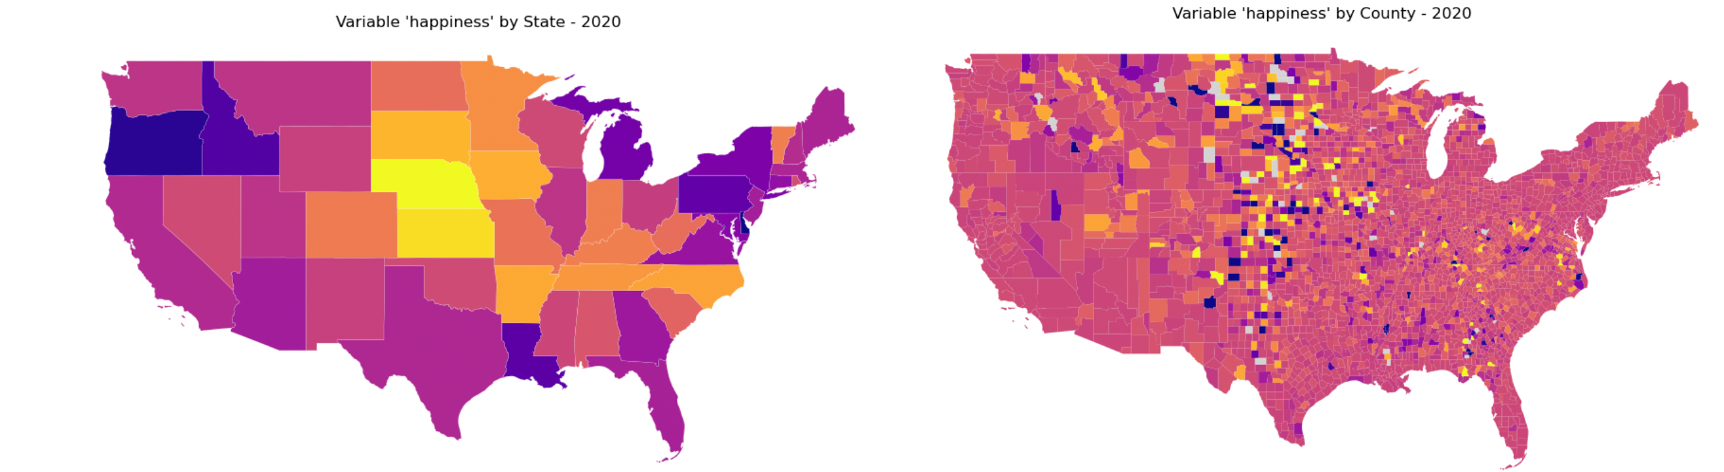

## Interpretation

## Next Steps

## Publications


1. Carpi, T., Hino, A., Iacus, S.M., Porro, G. (2022) The Impact of COVID-19 on Subjective Well-Being: Evidence from Twitter Data, Journal of Data Science 21(4), 761-780, __[DOI](https://jds-online.org/journal/JDS/article/1297/info)__.
2. Iacus, S. M., & Porro, G. (Eds.). (2023) Subjective well-being and social media. Routledge. ISBN: 9781032043166 __[LINK](https://www.routledge.com/Subjective-Well-Being-and-Social-Media/Iacus-Porro/p/book/9781032043166?srsltid=AfmBOopDDrHgFJs8bT0jeAnPVwZZfGRq9aUFL6z2fZmQxmMZEqIp9LU_)__.
3. Chai, Y., Kakkar, D., Palacios, J. et al. (2023) Twitter Sentiment Geographical Index Dataset, Sci Data 10, 684, __[DOI](https://www.nature.com/articles/s41597-023-02572-7)__.
4. Carammia, M., Iacus, S.M., Porro, G. (2024) Rethinking Scale: The Efficacy of Fine-Tuned Open-Source LLMs in Large-Scale Reproducible Social Science Research, ArXiv, __[DOI](https://arxiv.org/abs/2411.00890)__.

## Acknowledgements

Firstly, we would like to thank the **I-GUIDE team** for the opportunity to participate in this challenge. 
Special thanks to the following members of the I-GUIDE team for their continuous support and guidance throughout the project: Diana Sackton, Shaowen Wang, Anand Padmanabhan, Rajesh Kalyanam, Noah S. Oller Smith, and Nattapon Jaroenchai. 
We also like to acknowledge the **Harvard FASRC** team, especially Paul Edmon, for providing the additional computing resources essential to this work. 
Finally, we would like to thank Parag Khanna from **AlphaGeo** for generously sharing the county-level climate and resilience index data for the United States.

## Appendix

### Scripts for Fine-Tuning, Classification and Statistical Analysis 

These directory contain scripts for
* __[finetuning](https://github.com/siacus/flourishing-i-challenge/tree/main/scripts/finetuning)__ of LLMs
* __[classification](https://github.com/siacus/flourishing-i-challenge/tree/main/scripts/classification)__ of raw tweets
* __[construction of statistical indicators](https://github.com/siacus/flourishing-i-challenge/tree/main/scripts/indicators)__

These scripts should work on Anvil, Delta-AI and FASRC clusters. But read below before trying to run them.

What follows is a simplified set of instructions for replicability and some notes that we find useful.
Some tweaking are inevitable, like changing the account, allocation, SLURM partition names and folders.

These scripts assume you have an account on an ACCESS cluster or Harvard FARSC.
### ACCESS accounts: Anvil
* create an ACCESS account [here](https://operations.access-ci.org/identity/new-user) 
* login via SSH: follow the instructions [here](https://www.rcac.purdue.edu/knowledge/anvil/access/login). Essentially: First login to the web [Open OnDemand interface](https://ondemand.anvil.rcac.purdue.edu) using your ACCESS username and password, and then upload your public key by launching a shell from ODD console.
* configuring VSCODE: I find this [link](https://github.com/KempnerInstitute/kempner-computing-handbook/blob/main/kempner_computing_handbook/development_and_runtime_envs/using_vscode_for_remote_development.md) useful
* general instructions on how to run jobs on Anvil [here](https://www.rcac.purdue.edu/knowledge/anvil/run), and specifically [GPU jobs](https://www.rcac.purdue.edu/knowledge/anvil/run/examples/slurm)
* home directory ```/home/x-siacus``` (adjust)
* project directory:  ```$PROJECT``` or ```/anvil/projects/x-soc250007``` (adjust)
* scratch folder: ```/anvil/scratch/x-siacus/``` (adjust)

### ACCESS accounts: Delta-AI
* create an ACCESS account [here](https://operations.access-ci.org/identity/new-user) 
* login via SSH: follow the instructions [here](https://docs.ncsa.illinois.edu/systems/deltaai/en/latest/user-guide/login.html#ssh-examples).
* [Open OnDemand interface](https://gh-ondemand.delta.ncsa.illinois.edu/) using your NCSA username and password.
* configuring VSCODE: read this [page](https://docs.ncsa.illinois.edu/systems/deltaai/en/latest/user-guide/vscode/remote-ssh.html)
* general instructions on how to run jobs on Delta-AI [here](https://docs.ncsa.illinois.edu/systems/deltaai/en/latest/user-guide/running-jobs.html#partitions-queues)
* home directory ```/u/siacus``` (adjust)
* project directory:  ```$PROJECT``` or ```/projects/befu/siacus/``` (adjust)

### Harvard FASRC accounts
* login via SSH: follow the instructions [here](https://docs.rc.fas.harvard.edu/kb/ssh-to-a-compute-node/). Essentially: First login to the web [Open OnDemand interface](https://rcood.rc.fas.harvard.edu/pun/sys/dashboard/) using your FASRC username and password, and then upload your public key by launching a shell from ODD console.
* configuring VSCODE: I find this [link](https://github.com/KempnerInstitute/kempner-computing-handbook/blob/main/kempner_computing_handbook/development_and_runtime_envs/using_vscode_for_remote_development.md) useful
* general instructions on how to run jobs on FASRC [here](https://docs.rc.fas.harvard.edu/kb/running-jobs/), and specifically [GPU jobs](https://docs.rc.fas.harvard.edu/wp-content/uploads/2013/10/GPU_Computing_9_26.pdf)
* home directory ```/n/home11/siacus``` (adjust)
* scratch folder: ```/n/netscratch/siacus_lab``` (adjust)

#### Useful SLURM commands
* to know which partitions are available: ```showpartitions```
* to know jour jobs: ```squeue | grep siacus```   # (adjust username)
* to kill one of jour jobs: ```scancel job_num```
* to kill all your jobs: ```scancel -u $USER```

  
### Setting up a Conda Environment
All scripts run in a conda environment DO NOT USE MAMBA !

* How to build the conda environment that can be used for both fine-tuning and inference
#### Cluster modules for FASRC
```
module load nvhpc/23.7-fasrc01
module load cuda/12.2.0-fasrc01 
module load gcc/12.2.0-fasrc01
```
#### Cluster modules for Anvil
```
module purge
module load anaconda
```
#### Cluster modules for Delta-AI
```
module purge
module load nvhpc-openmpi3/24.3
module load gcc/11.4.0
module load nvhpc-hpcx-cuda12
```
* Building the actual environment
```
conda create -n cuda python=3.10
conda activate cuda
pip3 install accelerate peft bitsandbytes transformers trl
pip install huggingface-hub 
huggingface-cli login     # [ and pass read/write token]
pip install wandb  # wandb will ask for the same type of authentication on the first use
pip install psutil
pip install pandas tqdm datasets # should be already installed
````
* LLAMA-CPP-PYTHON installation for A100, H100 and H200
```
conda activate cuda
pip install llama-cpp-python \
  --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu122 \
  --force-reinstall --verbose
```
This is crucial if you use clusters with different versions of NVIDIA GPUs.

* Testing the environment
After spinning the VMs (see the examples below) always load the modules and the conda environment
```
conda activate cuda
```
#### On Anvil (adjust the allocation)
generic: 

```sinteractive -p shared  -N 1 -n 4 -A soc250007 -t 2:0:0```

for the gpu:

```sinteractive -p gpu -N 1 -n 4 -A soc250007-gpu --gres=gpu:1 -t 2:0:0```

#### On Delta-AI (adjust the allocation)
generic: 

```sinteractive -p shared  -N 1 -n 4 -A soc250007 -t 2:0:0```

for the gpu:

```
salloc --mem=16g --nodes=1 --ntasks-per-node=1 --cpus-per-task=2 \
  --partition=ghx4 \
  --account=befu-dtai-gh --time=00:30:00 --gpus-per-node=1
```


#### On Harvard FASRC
generic: 

```salloc -p test  --ntasks=1 --cpus-per-task=4 --mem=32G -t 120```

for the gpu: 

```salloc -p gpu_test --gres=gpu:1 --mem=40G -N 1 -t 120```


## Lessons Learned

Although the three clusters use SLURM, OOD and same GPUs, you need to spend some time in figuring out the correct modules to load.
SLURM on Anvil does not support ```--requeue``` which can be useful in our case.
After iterating on three clusters, in the end the scripts are more robust than their original versions.